# Data Collection & Preprocessing

In [ ]:
%pip install matplotlib numpy requests pandas seaborn tensorflow

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import requests
import pandas as pd
import seaborn as sns
from tensorflow.keras.layers import Dense,RepeatVector, LSTM, Bidirectional, Flatten, Conv1D, MaxPooling1D
from tensorflow.keras.models import Sequential, load_model

In [ ]:
import requests
import pandas as pd
from datetime import datetime

latitude = 30.4202
longitude = -9.5982
start_year = 2000
end_date = datetime.today().strftime('%Y-%m-%d')  # Get today's date, formatted

all_data = []

for year in range(2000, datetime.today().year + 1):
    start_date = f"{year}-01-01"
    year_end_date = f"{year}-12-31"

    # Don't go beyond today's date in the current year
    if year == datetime.today().year:
        year_end_date = end_date

    url = (
        f"https://archive-api.open-meteo.com/v1/archive"
        f"?latitude={latitude}&longitude={longitude}"
        f"&start_date={start_date}&end_date={year_end_date}"
        f"&hourly=,temperature_2m,dewpoint_2m,relative_humidity_2m,precipitation,"
        f"pressure_msl,windspeed_10m,cloudcover"
        f"&timezone=auto"
    )

    print(f"Fetching data for {start_date} to {year_end_date}...")
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        df_year = pd.DataFrame(data["hourly"])
        all_data.append(df_year)
    else:
        print(f"Failed to fetch data for {year}: {response.status_code}")

# Combine and save
df_all = pd.concat(all_data, ignore_index=True)
df_all.to_csv("agadir_weather.csv", index=False)
print("✅ Data saved to agadir_weather.csv")

Fetching data for 2000-01-01 to 2000-12-31...
Fetching data for 2001-01-01 to 2001-12-31...
Fetching data for 2002-01-01 to 2002-12-31...
Fetching data for 2003-01-01 to 2003-12-31...
Fetching data for 2004-01-01 to 2004-12-31...
Fetching data for 2005-01-01 to 2005-12-31...
Fetching data for 2006-01-01 to 2006-12-31...
Fetching data for 2007-01-01 to 2007-12-31...
Fetching data for 2008-01-01 to 2008-12-31...
Fetching data for 2009-01-01 to 2009-12-31...
Fetching data for 2010-01-01 to 2010-12-31...
Fetching data for 2011-01-01 to 2011-12-31...
Fetching data for 2012-01-01 to 2012-12-31...
Fetching data for 2013-01-01 to 2013-12-31...
Fetching data for 2014-01-01 to 2014-12-31...
Fetching data for 2015-01-01 to 2015-12-31...
Fetching data for 2016-01-01 to 2016-12-31...
Fetching data for 2017-01-01 to 2017-12-31...
Fetching data for 2018-01-01 to 2018-12-31...
Fetching data for 2019-01-01 to 2019-12-31...
Fetching data for 2020-01-01 to 2020-12-31...
Fetching data for 2021-01-01 to 20

In [ ]:
df = pd.read_csv("agadir_weather.csv")
df.head()

,time,temperature_2m,dewpoint_2m,relative_humidity_2m,precipitation,pressure_msl,windspeed_10m,cloudcover
0,2000-01-01T00:00,14.6,13.1,91.0,0.0,1019.7,5.1,0.0
1,2000-01-01T01:00,15.0,13.3,90.0,0.0,1019.9,4.3,0.0
2,2000-01-01T02:00,13.3,12.1,92.0,0.0,1019.8,5.4,7.0
3,2000-01-01T03:00,11.5,10.6,94.0,0.0,1019.5,6.6,29.0
4,2000-01-01T04:00,11.0,9.8,92.0,0.0,1019.7,7.1,9.0


In [ ]:
df['datetime_utc'] = pd.to_datetime(df['time'])
df.head()

,time,temperature_2m,dewpoint_2m,relative_humidity_2m,precipitation,pressure_msl,windspeed_10m,cloudcover,datetime_utc
0,2000-01-01T00:00,14.6,13.1,91.0,0.0,1019.7,5.1,0.0,2000-01-01 00:00:00
1,2000-01-01T01:00,15.0,13.3,90.0,0.0,1019.9,4.3,0.0,2000-01-01 01:00:00
2,2000-01-01T02:00,13.3,12.1,92.0,0.0,1019.8,5.4,7.0,2000-01-01 02:00:00
3,2000-01-01T03:00,11.5,10.6,94.0,0.0,1019.5,6.6,29.0,2000-01-01 03:00:00
4,2000-01-01T04:00,11.0,9.8,92.0,0.0,1019.7,7.1,9.0,2000-01-01 04:00:00


In [ ]:
df['relative_humidity_2m'].isna().sum()

np.int64(46)

In [ ]:
df['relative_humidity_2m'].fillna(df['relative_humidity_2m'].mean(), inplace=True)

/tmp/ipython-input-13-31296189.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['relative_humidity_2m'].fillna(df['relative_humidity_2m'].mean(), inplace=True)


In [ ]:
df['relative_humidity_2m'].isna().sum()

np.int64(0)

In [ ]:
# a function to extract year part from the whole date
def get_year(x):
  return x[0:4]
# a function to extract month part from the whole date
def get_month(x):
  return x[5:7]

In [ ]:
# making two new features year and month
df['year'] = df['datetime_utc'].apply(lambda x: get_year(str(x)))
df['month'] = df['datetime_utc'].apply(lambda x: get_month(str(x)))
df.head()

,time,temperature_2m,dewpoint_2m,relative_humidity_2m,precipitation,pressure_msl,windspeed_10m,cloudcover,datetime_utc,year,month
0,2000-01-01T00:00,14.6,13.1,91.0,0.0,1019.7,5.1,0.0,2000-01-01 00:00:00,2000,01
1,2000-01-01T01:00,15.0,13.3,90.0,0.0,1019.9,4.3,0.0,2000-01-01 01:00:00,2000,01
2,2000-01-01T02:00,13.3,12.1,92.0,0.0,1019.8,5.4,7.0,2000-01-01 02:00:00,2000,01
3,2000-01-01T03:00,11.5,10.6,94.0,0.0,1019.5,6.6,29.0,2000-01-01 03:00:00,2000,01
4,2000-01-01T04:00,11.0,9.8,92.0,0.0,1019.7,7.1,9.0,2000-01-01 04:00:00,2000,01


In [ ]:
temp_year = pd.crosstab(df['year'], df['month'], values=df['relative_humidity_2m'], aggfunc='mean')

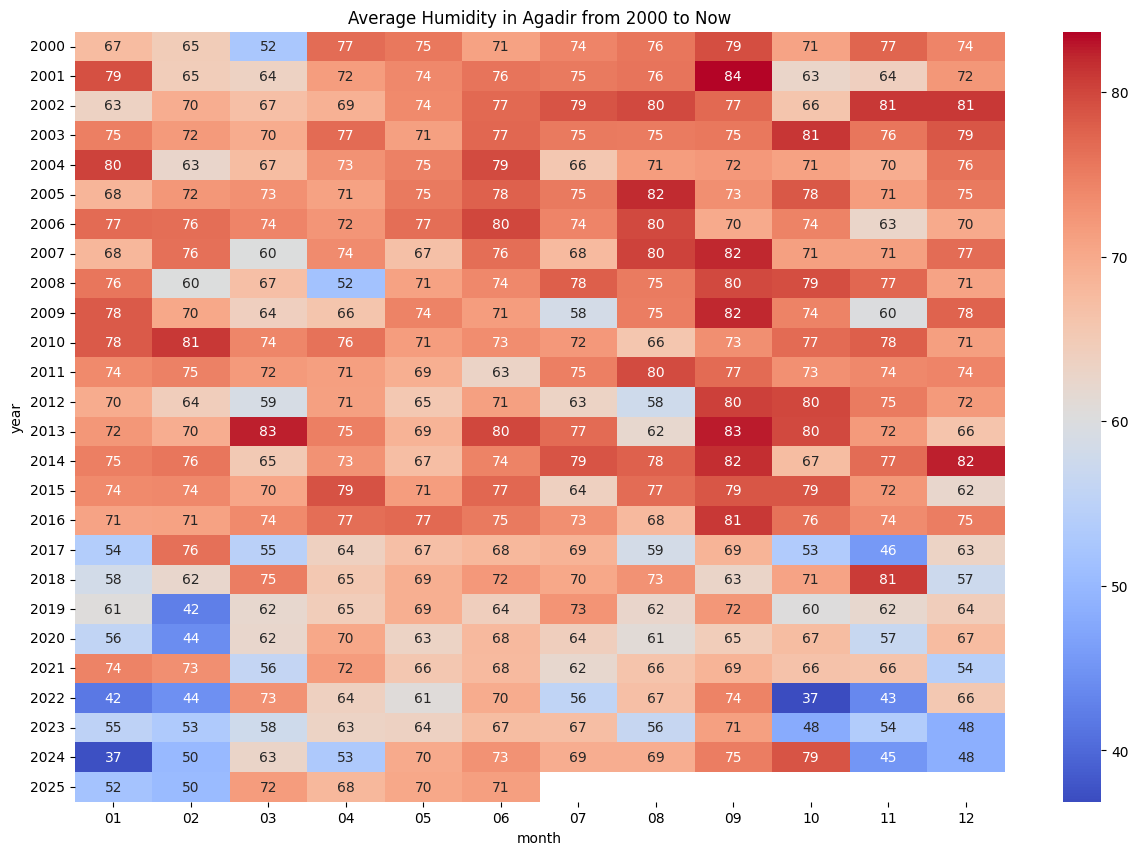

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(temp_year, cmap='coolwarm', annot=True)
plt.title("Average Humidity in Agadir from 2000 to Now")
plt.show()

In [ ]:
df.rename(columns={"relative_humidity_2m": "humidity", }, inplace=True)

In [ ]:
# taking only humidity feature as values and datetime feature as index in the dataframe for time series forecasting of humidity (Target-only approach )
data = pd.DataFrame(list(df['humidity']), index=df['datetime_utc'], columns=['humidity'])

In [ ]:
data.head()

,humidity
datetime_utc,
2000-01-01 00:00:00,91.0
2000-01-01 01:00:00,90.0
2000-01-01 02:00:00,92.0
2000-01-01 03:00:00,94.0
2000-01-01 04:00:00,92.0


In [ ]:
# resampling data with daily frequency to Predict daily humidity
data = data.resample('D').mean()

In [ ]:
data.shape

(9311, 1)

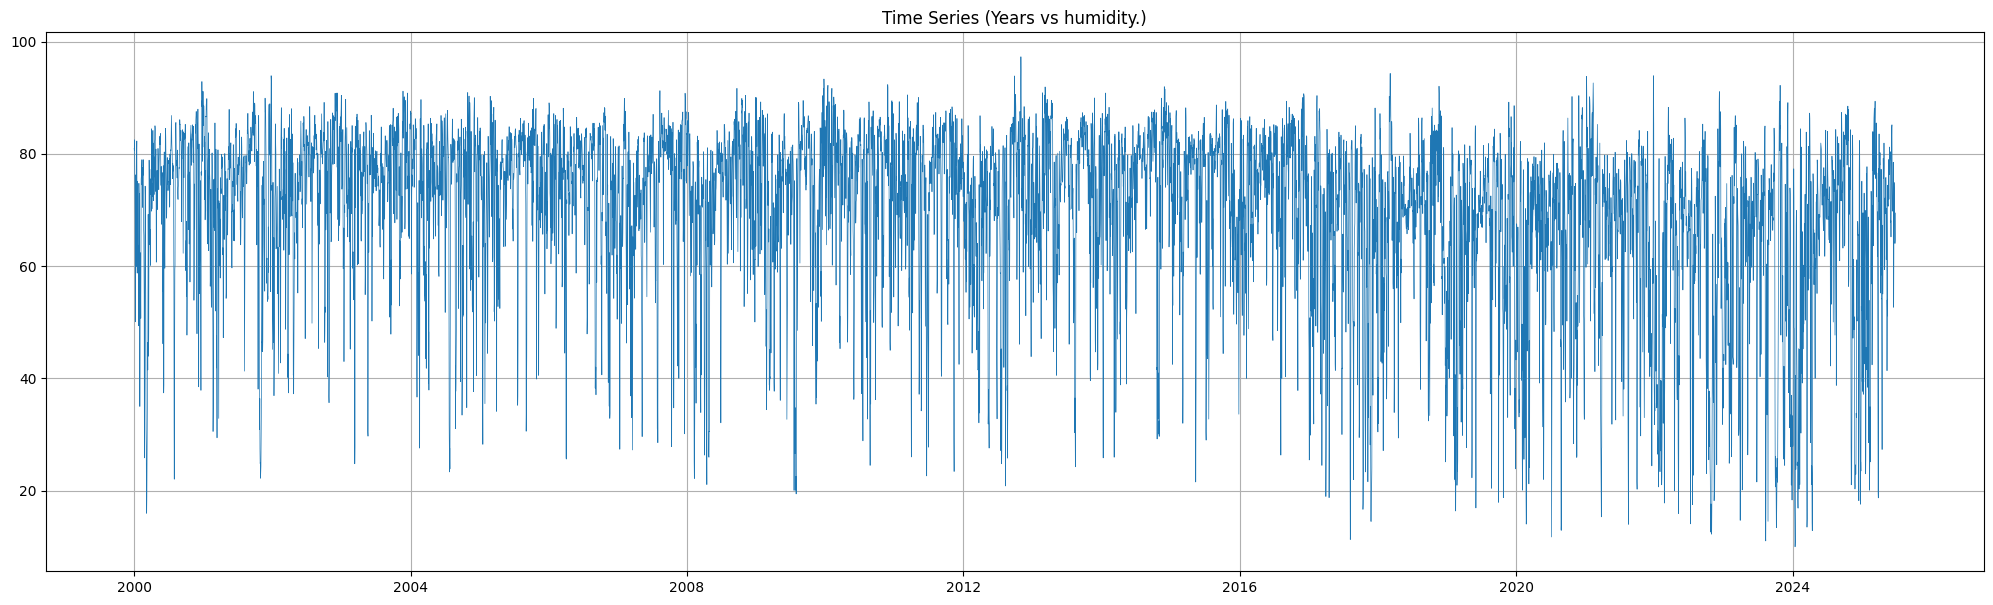

In [ ]:
plt.figure(figsize=(25, 7))
plt.plot(data, linewidth=.5)
plt.grid()
plt.title("Time Series (Years vs humidity.)")
plt.show()

In [ ]:
# Scaling data to get rid of outliers
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler(feature_range=(-1,1))
data_scaled = scalar.fit_transform(data)

In [ ]:
data_scaled

array([[0.62577566],
       [0.61813842],
       [0.66109785],
       ...,
       [0.25059666],
       [0.35178757],
       [0.36220175]])

In [ ]:
# Sliding window for SFT
steps = 30
inp = []
out = []
for i in range(len(data_scaled)- (steps)):
    inp.append(data_scaled[i:i+steps])
    out.append(data_scaled[i+steps])

In [ ]:
inp=np.asanyarray(inp)
out=np.asanyarray(out)

In [ ]:
train_split = int(0.8 * data_scaled.shape[0])  # 80% for training

x_train = inp[:train_split,:,:]
x_test = inp[train_split:,:,:]
y_train = out[:train_split]
y_test= out[train_split:]

In [ ]:
print(inp.shape)
print(x_train.shape)
print(x_test.shape)

(9281, 30, 1)
(7448, 30, 1)
(1833, 30, 1)


# Train a CNN+LSTM(MSE = 1730.6952934363105)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, RepeatVector, LSTM, Dropout, Bidirectional, Dense

model = Sequential()

#Extracts local patterns from sequences
model.add(Conv1D(filters=256, kernel_size=2, activation='relu', input_shape=(30,1)))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

#Converts CNN features back to sequences for LSTM processing
model.add(Flatten())
model.add(RepeatVector(30))

#4 stacked LSTM layers
model.add(LSTM(units=100, return_sequences=True, activation='relu'))
model.add(Dropout(0.2)) #regularization
model.add(LSTM(units=100, return_sequences=True, activation='relu'))
model.add(Dropout(0.2)) #regularization
model.add(LSTM(units=100, return_sequences=True, activation='relu'))
model.add(LSTM(units=100, return_sequences=True, activation='relu'))
model.add(Bidirectional(LSTM(128, activation='relu'))) #processes sequences forward/backward

#Output
model.add(Dense(100, activation='relu'))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 29, 256)        │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 28, 128)        │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 14, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1792)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector (RepeatVector)    │ (None, 30, 1792)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 30, 100)        │       757,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 30, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 30, 100)        │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 30, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 30, 100)        │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 30, 100)        │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 256)            │       234,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │        25,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,325,129 (5.05 MB)

 Trainable params: 1,325,129 (5.05 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='loss', patience=7, mode='min')

history = model.fit(
    x_train,
    y_train,
    epochs=50,
    verbose=1,
    callbacks=[early_stop]
)

Epoch 1/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 69s 257ms/step - loss: 0.0906
Epoch 2/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 73s 220ms/step - loss: 0.0469
Epoch 3/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 80s 213ms/step - loss: 0.0464
Epoch 4/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 81s 209ms/step - loss: 0.0444
Epoch 5/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 81s 208ms/step - loss: 0.0420
Epoch 6/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 83s 212ms/step - loss: 0.0444
Epoch 7/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 81s 208ms/step - loss: 0.0419
Epoch 8/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 82s 209ms/step - loss: 0.0409
Epoch 9/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 82s 209ms/step - loss: 0.0396
Epoch 10/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 82s 210ms/step - loss: 0.0388
Epoch 11/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 49s 208ms/step - loss: 0.0388
Epoch 12/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 82s 210ms/step - loss: 0.0365
Epoch 13/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 82s 208ms/step - loss: 0.0370
Epoch 14/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 82s 209ms/step - loss: 0.0388
Epoch 15/50
233

In [ ]:
model.save("./humidity.keras")

In [ ]:
from tensorflow.keras.models import load_model

model = load_model('./humidity.keras')

58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step


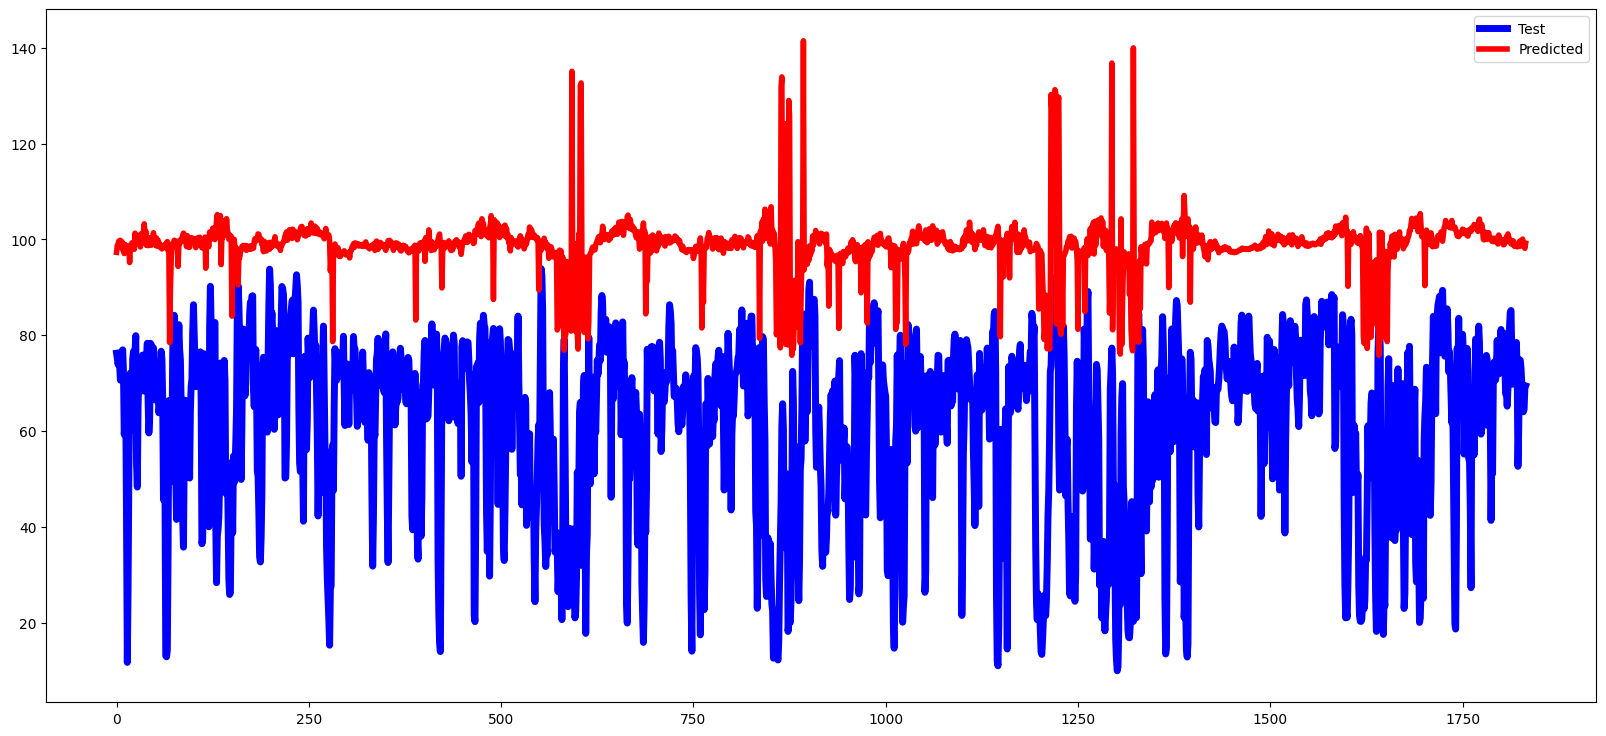

1730.6952934363105

In [ ]:
predict = model.predict(x_test)

predict = scalar.inverse_transform(predict)
Ytesting = scalar.inverse_transform(y_test)

plt.figure(figsize=(20,9))
plt.plot(Ytesting , 'blue', linewidth=5)
plt.plot(predict,'r' , linewidth=4)
plt.legend(('Test','Predicted'))
plt.show()

from sklearn.metrics import mean_squared_error
mean_squared_error(Ytesting, predict)

# Train Transformer (MSE = 110.9470)

In [ ]:
!pip install torch

In [ ]:
import torch
import torch.nn as nn
import math

In [ ]:
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=5000):
        super().__init__()
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len).unsqueeze(1).float()
        div_term = torch.exp(torch.arange(0, d_model, 2).float() *
                           -(math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        self.register_buffer('pe', pe.unsqueeze(0))

    def forward(self, x):
        return x + self.pe[:, :x.size(1)]

In [ ]:
class LightweightTransformer(nn.Module):
    def __init__(self, input_dim=1, d_model=64, nhead=4, num_layers=2,
                 seq_len=168, pred_len=1):
        super().__init__()

        # Input projection
        self.input_projection = nn.Linear(input_dim, d_model)

        # Positional encoding
        self.pos_encoder = PositionalEncoding(d_model)

        # Transformer encoder
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=d_model,
            nhead=nhead,
            dim_feedforward=256,
            dropout=0.1,
            batch_first=True
        )
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers)

        # Output projection
        self.output_projection = nn.Sequential(
            nn.Linear(d_model, 32),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(32, pred_len)
        )

    def forward(self, x):
        # x shape: (batch_size, seq_len, input_dim)
        x = self.input_projection(x)
        x = self.pos_encoder(x)
        x = self.transformer(x)

        # Use last token for prediction
        x = x[:, -1, :]  # (batch_size, d_model)
        output = self.output_projection(x)

        return output

In [ ]:
# Training setup
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

def train_model(model, train_loader, val_loader, epochs=50):
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=5)

    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)

    for epoch in range(epochs):
        # Training
        model.train()
        train_loss = 0
        for batch_x, batch_y in train_loader:
            batch_x, batch_y = batch_x.to(device), batch_y.to(device)

            optimizer.zero_grad()
            pred = model(batch_x)
            loss = criterion(pred, batch_y)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()

        # Validation
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for batch_x, batch_y in val_loader:
                batch_x, batch_y = batch_x.to(device), batch_y.to(device)
                pred = model(batch_x)
                val_loss += criterion(pred, batch_y).item()

        train_loss /= len(train_loader)
        val_loss /= len(val_loader)
        scheduler.step(val_loss)

        if epoch % 10 == 0:
            print(f'Epoch {epoch}: Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')

In [ ]:
# Create datasets
train_dataset = TensorDataset(torch.FloatTensor(x_train),
                             torch.FloatTensor(y_train))
val_dataset = TensorDataset(torch.FloatTensor(x_test),
                           torch.FloatTensor(y_test))

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

In [ ]:
# Initialize and train model
model = LightweightTransformer(
    input_dim=1,
    d_model=64,
    nhead=4,
    num_layers=2,
    seq_len=30,
    pred_len=1
)

print(f"Model parameters: {sum(p.numel() for p in model.parameters()):,}")
train_model(model, train_loader, val_loader, epochs=200)

Model parameters: 102,209
Epoch 0: Train Loss: 0.0546, Val Loss: 0.0637
Epoch 10: Train Loss: 0.0421, Val Loss: 0.0585
Epoch 20: Train Loss: 0.0405, Val Loss: 0.0562
Epoch 30: Train Loss: 0.0388, Val Loss: 0.0576
Epoch 40: Train Loss: 0.0382, Val Loss: 0.0575
Epoch 50: Train Loss: 0.0387, Val Loss: 0.0576
Epoch 60: Train Loss: 0.0384, Val Loss: 0.0576
Epoch 70: Train Loss: 0.0388, Val Loss: 0.0576
Epoch 80: Train Loss: 0.0384, Val Loss: 0.0576
Epoch 90: Train Loss: 0.0382, Val Loss: 0.0576
Epoch 100: Train Loss: 0.0383, Val Loss: 0.0576
Epoch 110: Train Loss: 0.0386, Val Loss: 0.0576
Epoch 120: Train Loss: 0.0385, Val Loss: 0.0576
Epoch 130: Train Loss: 0.0389, Val Loss: 0.0576
Epoch 140: Train Loss: 0.0385, Val Loss: 0.0576
Epoch 150: Train Loss: 0.0387, Val Loss: 0.0576
Epoch 160: Train Loss: 0.0387, Val Loss: 0.0576
Epoch 170: Train Loss: 0.0386, Val Loss: 0.0576
Epoch 180: Train Loss: 0.0386, Val Loss: 0.0576
Epoch 190: Train Loss: 0.0383, Val Loss: 0.0576


In [ ]:
# Save the trained model
torch.save({
    'model_state_dict': model.state_dict(),
    'model_config': {
        'input_dim': 1,
        'd_model': 64,
        'nhead': 4,
        'num_layers': 2,
        'seq_len': 30,
        'pred_len': 1
    }
}, 'lightweight_transformer.pth')

print("Model saved as 'lightweight_transformer.pth'")

Model saved as 'lightweight_transformer.pth'


In [ ]:
# Load model
# This function was attempting to load a Keras model using torch.load, which caused an error.
# It has been removed.
# def load_model(path):
#     checkpoint = torch.load(path)
#     config = checkpoint['model_config']

#     model = LightweightTransformer(**config)
#     model.load_state_dict(checkpoint['model_state_dict'])
#     return model

In [ ]:
loaded_model = load_model('lightweight_transformer.pth')

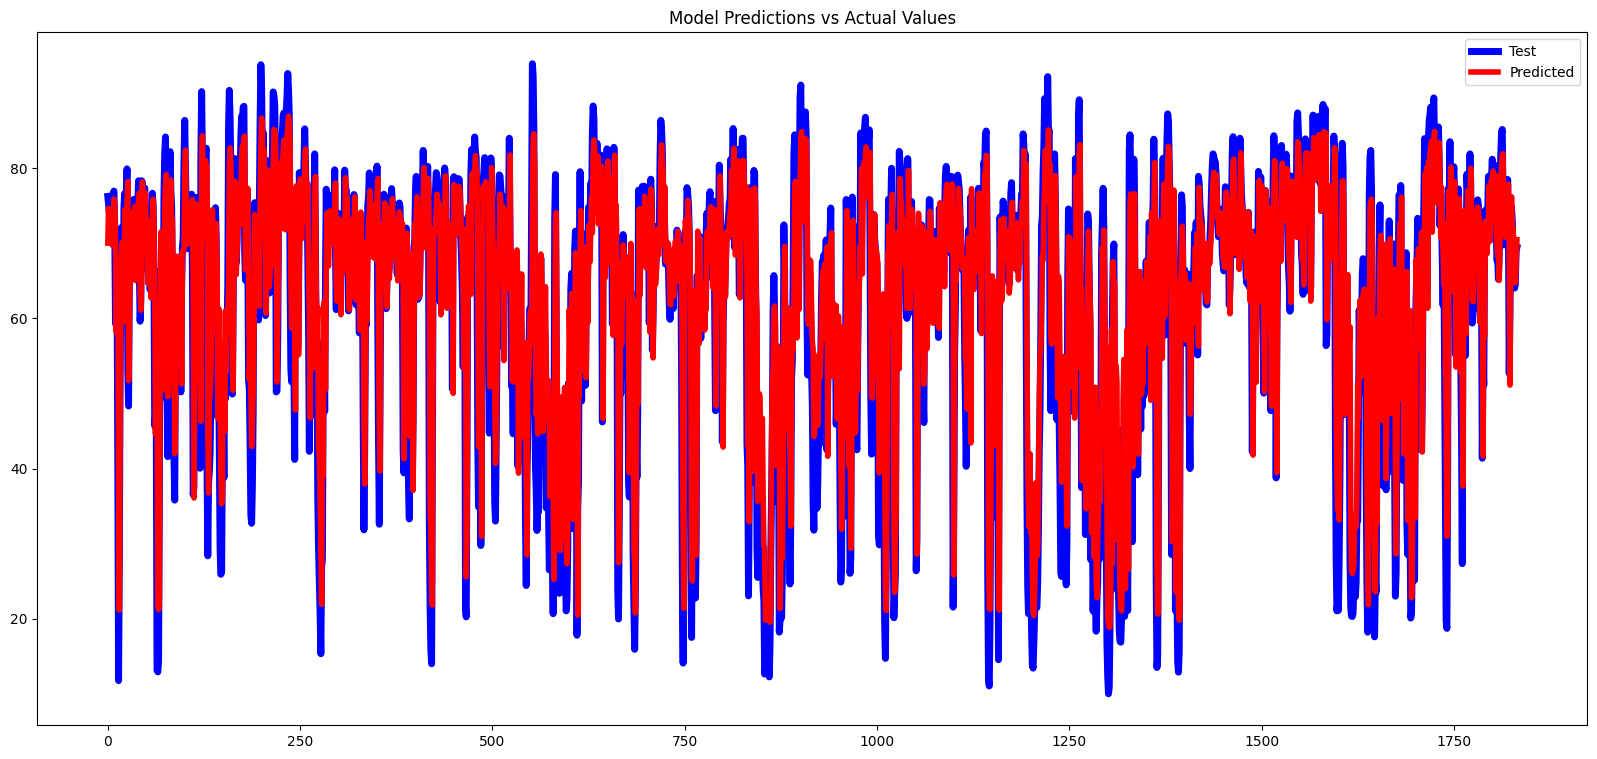

Mean Squared Error: 110.9470


In [ ]:
# Test the model

import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

model.eval()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

with torch.no_grad():
    x_test_tensor = torch.FloatTensor(x_test).to(device)
    predictions = model(x_test_tensor).cpu().numpy()

# Inverse transform predictions and actual values
predictions_original = scalar.inverse_transform(predictions)
y_test_original = scalar.inverse_transform(y_test)

# Plot results
plt.figure(figsize=(20,9))
plt.plot(y_test_original, 'blue', linewidth=5, label='Test')
plt.plot(predictions_original, 'r', linewidth=4, label='Predicted')
plt.legend()
plt.title('Model Predictions vs Actual Values')
plt.show()

# Calculate MSE
mse = mean_squared_error(y_test_original, predictions_original)
print(f"Mean Squared Error: {mse:.4f}")

# Finetuning(dosen't work)

In [ ]:
!pip install -U transformers

In [ ]:
!pip install datasets accelerate bitsandbytes peft torch

In [ ]:
import torch
from transformers import (
    AutoTokenizer,
    AutoModelForSeq2SeqLM,
    TrainingArguments,
    Trainer,
    BitsAndBytesConfig
)
from peft import LoraConfig, get_peft_model, TaskType
from datasets import Dataset
import numpy as np

In [ ]:
# Prepare for Chronos
train_sequences = x_train.squeeze(-1)
train_targets = y_train.squeeze(-1)
test_sequences = x_test.squeeze(-1)
test_targets = y_test.squeeze(-1)

In [ ]:
print(f"Train shape: {train_sequences.shape}, {train_targets.shape}")
print(f"Test shape: {test_sequences.shape}, {test_targets.shape}")

In [ ]:
# QLoRA configuration
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.float16
)

In [ ]:
# Load model and tokenizer
model_name = "amazon/chronos-t5-small"
# tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(
    model_name,
    quantization_config=bnb_config,
    device_map="auto"
)

In [ ]:
# LoRA configuration
lora_config = LoraConfig(
    task_type=TaskType.SEQ_2_SEQ_LM,
    inference_mode=False,
    r=8,
    lora_alpha=32,
    lora_dropout=0.1,
    target_modules=["q", "v"]
)

In [ ]:
# Apply LoRA
model = get_peft_model(model, lora_config)
model.print_trainable_parameters()

In [ ]:
def prepare_dataset(sequences, targets, context_length=512, prediction_length=96):
    """Convert time series to model format"""
    inputs = []
    labels = []

    for seq, target in zip(sequences, targets):
        # Normalize sequences
        seq_normalized = (seq - np.mean(seq)) / (np.std(seq) + 1e-8)
        target_normalized = (target - np.mean(seq)) / (np.std(seq) + 1e-8)

        inputs.append(seq_normalized.tolist())
        labels.append(target_normalized.tolist())

    return Dataset.from_dict({
        'input_values': inputs,
        'labels': labels
    })

In [ ]:
# Create datasets (replace with your data)
train_dataset = prepare_dataset(train_sequences, train_targets)
val_dataset = prepare_dataset(test_sequences, test_targets)

In [ ]:
def data_collator(features):
    input_values = [torch.tensor(f['input_values'], dtype=torch.float32) for f in features]
    labels = [torch.tensor(f['labels'], dtype=torch.float32) for f in features]

    input_values = torch.stack(input_values)
    labels = torch.stack(labels)

    return {
        'input_values': input_values,
        'labels': labels
    }

In [ ]:
# Training arguments
training_args = TrainingArguments(
    output_dir="./chronos-finetuned",
    num_train_epochs=3,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    gradient_accumulation_steps=4,
    warmup_steps=100,
    learning_rate=5e-4,
    fp16=True,
    logging_steps=50,
    eval_steps=200,
    save_steps=400,
    eval_strategy="steps",
    load_best_model_at_end=True,
    metric_for_best_model="eval_loss",
    greater_is_better=False,
    dataloader_pin_memory=False,
    remove_unused_columns=False,
    report_to="none"
)

In [ ]:
# Initialize trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    data_collator=data_collator,
)

In [ ]:
!pip install chronos

In [ ]:
from chronos import ChronosPipeline

# Load pipeline
pipeline = ChronosPipeline.from_pretrained(
    "amazon/chronos-t5-small",
    device_map="cuda",
    torch_dtype=torch.bfloat16,
)

# Fine-tune using pipeline's built-in methods
pipeline.fit(
    time_series_data=train_sequences,
    num_epochs=10,
    batch_size=32
)

In [ ]:
# Fine-tune the model
trainer.train()

In [ ]:
# Save the fine-tuned model
model.save_pretrained("./chronos-finetuned-qlora")
tokenizer.save_pretrained("./chronos-finetuned-qlora")

## Inference

In [ ]:
def predict_humidity(model, tokenizer, input_sequence, prediction_length=96):
    """Generate humidity predictions"""
    model.eval()

    # Normalize input
    seq_mean = np.mean(input_sequence)
    seq_std = np.std(input_sequence) + 1e-8
    normalized_seq = (input_sequence - seq_mean) / seq_std

    # Convert to tensor
    input_tensor = torch.tensor(normalized_seq, dtype=torch.float32).unsqueeze(0)

    with torch.no_grad():
        # Generate predictions
        outputs = model.generate(
            input_values=input_tensor,
            max_length=prediction_length,
            num_beams=1,
            do_sample=False
        )

    # Denormalize predictions
    predictions = outputs[0].cpu().numpy()
    denormalized_preds = predictions * seq_std + seq_mean

    return denormalized_preds

In [ ]:
predictions = predict_humidity(model, tokenizer, your_input_sequence)